In [21]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np

In [22]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpus[0]                                        #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")

In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [24]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [25]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

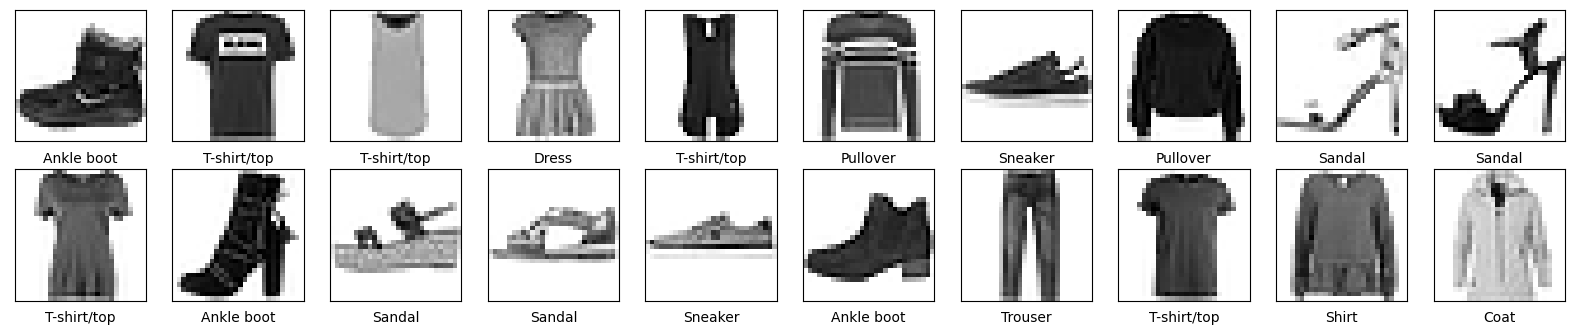

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   #池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  #卷积层3，卷积核3*3

    layers.Flatten(),                      #Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),   #全连接层，特征进一步提取
    layers.Dense(10)                       #输出层，输出预期结果
])

model.summary()  # 打印网络结构

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4929 - accuracy: 0.8184 - val_loss: 0.3908 - val_accuracy: 0.8632
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3176 - accuracy: 0.8828 - val_loss: 0.3170 - val_accuracy: 0.8857
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2714 - accuracy: 0.9003 - val_loss: 0.2839 - val_accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2422 - accuracy: 0.9104 - val_loss: 0.2868 - val_accuracy: 0.8966
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2185 - accuracy: 0.9184 - val_loss: 0.2760 - val_accuracy: 0.9009
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1982 - accuracy: 0.9254 - val_loss: 0.2694 - val_accuracy: 0.9041
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1818 - accuracy: 0.9310 - val_loss: 0.2688 - val_ac

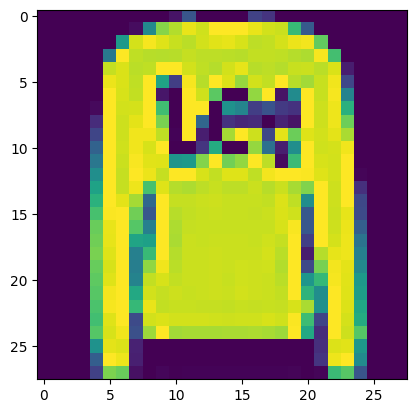

In [30]:
plt.imshow(test_images[1])

In [31]:
pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

Pullover


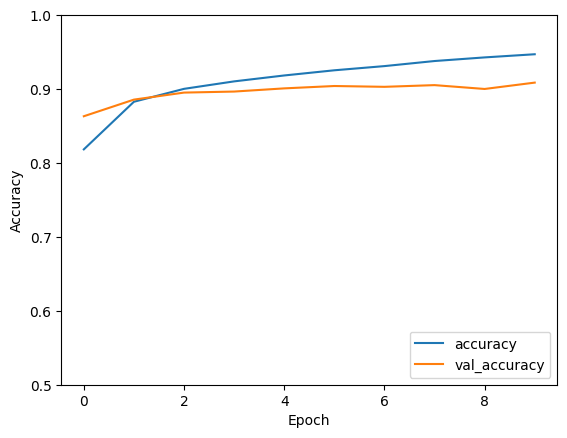

313/313 - 1s - loss: 0.2830 - accuracy: 0.9087


In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
print("测试准确率为：",test_acc)

测试准确率为： 0.9086999893188477
